In [ ]:
#!pip install scikit-learn


## 1. Preparação dos Dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest

# Carregar o CSV
df = pd.read_csv('2018_detalhemento_cfem_ordinario.csv')

# Limpeza e conversão de valores para float
colunas_financeiras = ['Acumulado até o Período - Dotação Inicial', 
                'Acumulado até o Período - Créditos Adicionais/Reduções', 
                'Acumulado até o Período - Dotação Atualizada', 
                'No Período - Valor Empenhado', 
                'No Período - Valor Em Liquidação', 
                'No Período - Valor Liquidado', 
                'No Período - Valor Pago']
# Remover "R$" e ajustar separadores
for coluna in colunas_financeiras:
    df[coluna] = df[coluna].str.replace("R\$", "", regex=True)  # Remove "R$"
    df[coluna] = df[coluna].str.replace(".", "", regex=False)  # Remove separadores de milhar
    df[coluna] = df[coluna].str.replace(",", ".", regex=False)  # Substitui vírgula por ponto (decimal)

# Converter para tipo float
for coluna in colunas_financeiras:
    df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

print(df.head())

# Remover valores nulos e inconsistências
df.dropna(subset=['Descrição'], inplace=True)


## 2. Clusterização de Despesas
Agrupamos categorias com padrões financeiros semelhantes usando K-Means.

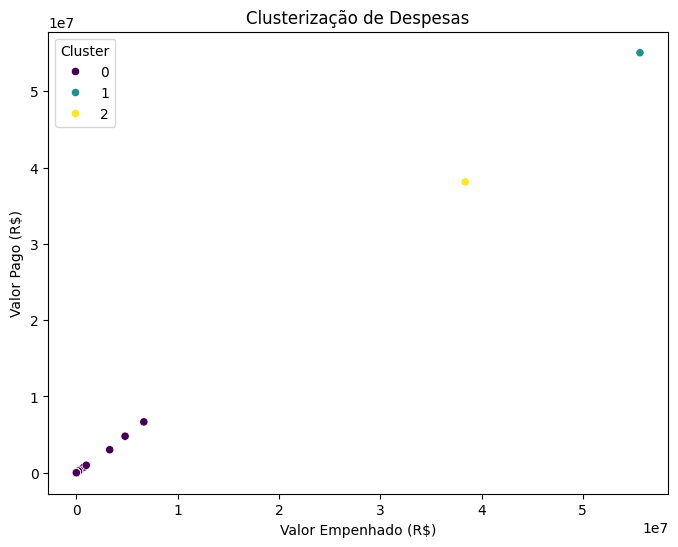

In [5]:
from sklearn.preprocessing import StandardScaler

# Selecionar variáveis financeiras para clusterização
features = ['Acumulado até o Período - Dotação Inicial', 
            'No Período - Valor Empenhado', 
            'No Período - Valor Pago']
X = df[features]

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='No Período - Valor Empenhado', y='No Período - Valor Pago', hue='Cluster', palette='viridis')
plt.title('Clusterização de Despesas')
plt.xlabel('Valor Empenhado (R$)')
plt.ylabel('Valor Pago (R$)')
plt.show()


## 3. Análise de Correlação
Identificamos relações entre variáveis financeiras.

In [ ]:
# Matriz de correlação
corr = df[colunas_financeiras].corr()


# Visualizar com heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


In [14]:
import pandas as pd

# Exemplo de DataFrame
data = {
    "Descrição": ["Item A", "Item B", "Item C"],
    "Dotação Inicial": [1000, 2000, 1500],
    "Créditos Adicionais/Reduções": [-100, 300, -200],
    "Dotação Atualizada": [900, 2300, 1300]
}
df = pd.DataFrame(data)

# Focando em colunas numéricas e transpondo
df_numeric = df.drop(columns=["Descrição"]).T

# Calculando a correlação entre os eixos (linhas originais)
correlation_matrix = df_numeric.corr()

print("Matriz de correlação entre eixos (linhas):")
print(correlation_matrix)


Matriz de correlação entre eixos (linhas):
          0         1         2
0  1.000000  0.975499  0.999674
1  0.975499  1.000000  0.969563
2  0.999674  0.969563  1.000000
